In [1]:
# load libs
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
%matplotlib inline

In [2]:
# global variables
g_raw_data = {
    "task1": {
        "Car_d1": {case: 63.4 for case in ["joint_training", "lwf", "fine_tuning"]},
        "Car_d2": {case: 54.7 for case in ["joint_training", "lwf", "fine_tuning"]},
        "Car_d3": {case: 59.4 for case in ["joint_training", "lwf", "fine_tuning"]}
    },
    "task2": {
        "Car_d1": {
            "joint_training": "61.0+-2.3",
            "lwf": "62.8+-0.3",
            "fine_tuning": "0.0+-0.0",
        },
        "Car_d2": {
            "joint_training": "58.1+-0.5",
            "lwf": "56.6+-0.2",
            "fine_tuning": "0.0+-0.0",
        },
        "Ped_d2": {
            "joint_training": "49.8+-0.1",
            "lwf": "49.4+-0.1",
            "fine_tuning": "49.6+-0.0",
        },
        "Car_d3": {
            "joint_training": "60.5+-1.3",
            "lwf": "59.5+-0.0",
            "fine_tuning": "0.0+-0.0",
        },
        "Ped_d3": {
            "joint_training": "66.0+-0.5",
            "lwf": "60.1+-1.8",
            "fine_tuning": "62.8+-2.5",
        },
    },
    "task3": {
        "Car_d1": {
            "joint_training": "56.3+-0.4",
            "lwf": "57.2+-0.2",
            "fine_tuning": "0.0+-0.0",
        },
        "Car_d2": {
            "joint_training": "53.7+-2.3",
            "lwf": "56.6+-0.8",
            "fine_tuning": " 0.0+-0.0  ",
        },
        "Ped_d2": {
            "joint_training": "49.6+-0.0",
            "lwf": "42.3+-2.6",
            "fine_tuning": "0.0+-0.0",
        },
        "Car_d3": {
            "joint_training": "59.7+-0.2",
            "lwf": "59.4+-0.1",
            "fine_tuning": "0.0+-0.0",
        },
        "Ped_d3": {
            "joint_training": "66.8+-0.6",
            "lwf": "57.9+-0.4",
            "fine_tuning": "0.0+-0.0",
        },
        "Cyc_d3": {
            "joint_training": "67.8+-1.8",
            "lwf": "61.7+-1.6",
            "fine_tuning": "58.6+-4.1",
        },
    }
}
g_plt_marker = {
    "joint_training": "ro-",
    "lwf": "bx-",
    "fine_tuning": "g*-",
}

In [3]:
# define functions
def parse_data(raw_data):
    def rec_func(data_dict, mode):
        for k, v in data_dict.items():
            if isinstance(v, dict):
                rec_func(data_dict[k], mode)
            elif isinstance(v, float) and mode == "mean":
                pass
            elif isinstance(v, float) and mode == "std":
                data_dict[k] = 0
            else:
                if "+-" in data_dict[k] and mode == "mean":
                    data_dict[k] = float(v.split("+-")[0])
                elif "+-" in data_dict[k] and mode == "std":
                    data_dict[k] = float(v.split("+-")[1])
                else:
                    pass
    mean_data = deepcopy(raw_data)
    std_data = deepcopy(raw_data)
    rec_func(mean_data, "mean")
    rec_func(std_data, "std")
    return mean_data, std_data

def prepare_data(mean_data, std_data, cls, domain):
    '''
    -> plotdata_dict = {
    "joint_training": {"x": [], "y": [], "std": []},
    "lwf": {"x": [], "y": [], "std": []},
    "fine_tuning": {"x": [], "y": [], "std": []},
    }
    '''
    plotdata_dict = {
        "joint_training": {"x": [], "y": [], "std": []},
        "lwf": {"x": [], "y": [], "std": []},
        "fine_tuning": {"x": [], "y": [], "std": []},
    }
    for i, task in enumerate(["task1", "task2", "task3"]):
        if cls == "Pedestrian" and task == "task1":
            continue
        elif cls == "Cyclist" and task in ["task1", "task2"]:
            continue
        for case in ["joint_training", "lwf", "fine_tuning"]:
            plotdata_dict[case]["x"].append(i)
            plotdata_dict[case]["y"].append(mean_data[task][f"{cls[:3]}_d{domain[-1]}"][case])
            plotdata_dict[case]["std"].append(std_data[task][f"{cls[:3]}_d{domain[-1]}"][case])
    return plotdata_dict
    
    

In [4]:
# parse data
mean_data, std_data = parse_data(g_raw_data)
print(mean_data)
# ## prepare Car Domain 1
pltdata_car_d1 = prepare_data(mean_data, std_data, "Car", "domain1")
print(pltdata_car_d1)
## prepare Car Domain 2
pltdata_car_d2 = prepare_data(mean_data, std_data, "Car", "domain2")
## prepare Car Domain 3
pltdata_car_d3 = prepare_data(mean_data, std_data, "Car", "domain3")
## prepare Ped Domain 2
pltdata_ped_d2 = prepare_data(mean_data, std_data, "Pedestrian", "domain2")
## prepare Ped Domain 2
pltdata_ped_d3 = prepare_data(mean_data, std_data, "Pedestrian", "domain3")
## prepare Cyc domain 3
pltdata_cyc_d3 = prepare_data(mean_data, std_data, "Cyclist", "domain3")

{'task1': {'Car_d1': {'joint_training': 63.4, 'lwf': 63.4, 'fine_tuning': 63.4}, 'Car_d2': {'joint_training': 54.7, 'lwf': 54.7, 'fine_tuning': 54.7}, 'Car_d3': {'joint_training': 59.4, 'lwf': 59.4, 'fine_tuning': 59.4}}, 'task2': {'Car_d1': {'joint_training': 61.0, 'lwf': 62.8, 'fine_tuning': 0.0}, 'Car_d2': {'joint_training': 58.1, 'lwf': 56.6, 'fine_tuning': 0.0}, 'Ped_d2': {'joint_training': 49.8, 'lwf': 49.4, 'fine_tuning': 49.6}, 'Car_d3': {'joint_training': 60.5, 'lwf': 59.5, 'fine_tuning': 0.0}, 'Ped_d3': {'joint_training': 66.0, 'lwf': 60.1, 'fine_tuning': 62.8}}, 'task3': {'Car_d1': {'joint_training': 56.3, 'lwf': 57.2, 'fine_tuning': 0.0}, 'Car_d2': {'joint_training': 53.7, 'lwf': 56.6, 'fine_tuning': 0.0}, 'Ped_d2': {'joint_training': 49.6, 'lwf': 42.3, 'fine_tuning': 0.0}, 'Car_d3': {'joint_training': 59.7, 'lwf': 59.4, 'fine_tuning': 0.0}, 'Ped_d3': {'joint_training': 66.8, 'lwf': 57.9, 'fine_tuning': 0.0}, 'Cyc_d3': {'joint_training': 67.8, 'lwf': 61.7, 'fine_tuning': 58

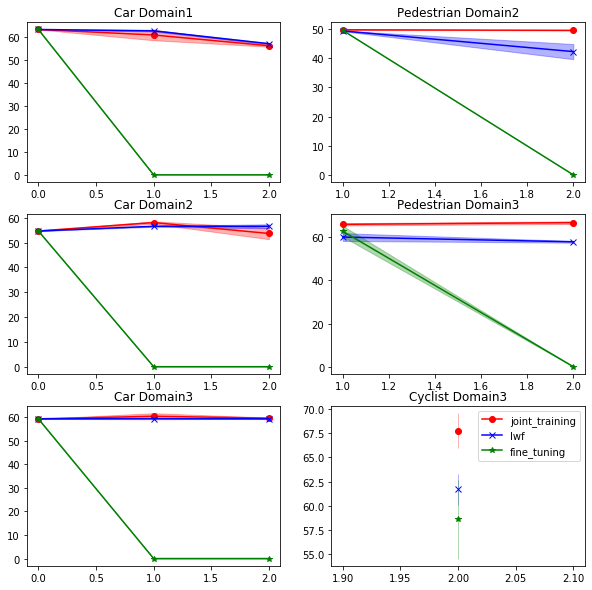

In [5]:
# plot figures (subplots 3x2)
plt.figure(figsize=(10,10))
plt_list = [
    [(3,2,1), pltdata_car_d1, "Car Domain1"],
    [(3,2,2+1), pltdata_car_d2, "Car Domain2"],
    [(3,2,2*2+1), pltdata_car_d3, "Car Domain3"],
    [(3,2,2), pltdata_ped_d2, "Pedestrian Domain2"],
    [(3,2,2+2), pltdata_ped_d3, "Pedestrian Domain3"],
    [(3,2,2*2+2), pltdata_cyc_d3, "Cyclist Domain3"],
]
for plt_list_ in plt_list:
    position, pltdata, title = plt_list_
    plt.subplot(*position)
    plt.title(title)
    for k in pltdata.keys():
        plt.plot(pltdata[k]["x"], pltdata[k]["y"], g_plt_marker[k])
        plt.fill_between(pltdata[k]["x"],
                         [y-std for y, std in zip(pltdata[k]["y"], pltdata[k]["std"])],
                         [y+std for y, std in zip(pltdata[k]["y"], pltdata[k]["std"])],
                         color=g_plt_marker[k][0],alpha=0.3)

plt.legend([k for k in pltdata_car_d1.keys()])
plt.show()